<a href="https://colab.research.google.com/github/Ashrithajangam/IT7133-FALL24/blob/main/Assignment_3_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
model_path = '/content/drive/My Drive/Model/Assignment_3_Model'

In [2]:
!pip install transformers
from google.colab import drive
drive.mount('/content/drive')
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import os
from IPython.display import clear_output
from transformers import AutoImageProcessor
from transformers import TFAutoModelForImageClassification
import keras
import keras.layers as layers
import tensorflow as tf

checkpoint = "google/vit-base-patch16-224-in21k"
image_processor = AutoImageProcessor.from_pretrained(checkpoint)
model = TFAutoModelForImageClassification.from_pretrained(model_path)

Mounted at /content/drive


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
All model checkpoint layers were used when initializing TFViTForImageClassification.

All the layers of TFViTForImageClassification were initialized from the model checkpoint at /content/drive/My Drive/Model/Assignment_3_Model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFViTForImageClassification for predictions without further training.


Saving 60.jpeg to 60.jpeg


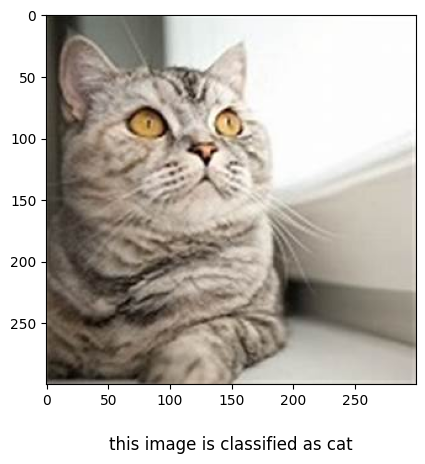

In [ ]:
while True:
  uploaded = files.upload()
  uploaded_name = list(uploaded.keys())[0]
  extension = uploaded_name.split('.')[1]
  os.rename(uploaded_name, 'temp' + '.' + extension)
  image = Image.open('temp' + '.' + extension)
  image = image.convert("RGB")
  inputs = image_processor(image, return_tensors="tf")
  logits = model(**inputs).logits
  predicted_class_id = int(tf.math.argmax(logits, axis=-1)[0])
  label = model.config.id2label[predicted_class_id]
  plt.imshow(image)
  plt.title('this image is classified as ' + label, y=-0.2)
  plt.show()
  input('press enter to continue...\n')
  clear_output(wait=True)